In [1]:
!pip install -q tensorflow==2.0.0-alpha0

# Machine Learning in TensorFlow

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../information_theory.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [2]:
import data
%matplotlib inline
from matplotlib import pyplot as plt

(1000, 2)


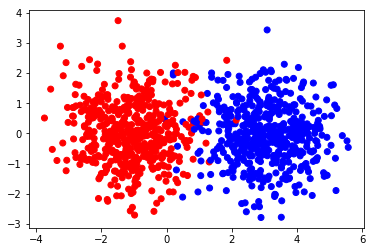

In [3]:
X_train, y_train, X_test, y_test = data.generate_data(1000, 10)
print(X_train.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

Make sure the next cell outputs 2.0.0-alpha0.  If it doesn't, run the top cell of this notebook again.

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0-alpha0


In [5]:
# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent.  You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 142us/sample - loss: 0.3453 - accuracy: 0.8310
Epoch 2/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.3306 - accuracy: 0.8410
Epoch 3/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.3165 - accuracy: 0.8500
Epoch 4/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.3036 - accuracy: 0.8560
Epoch 5/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.2913 - accuracy: 0.8630
Epoch 6/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.2801 - accuracy: 0.8730
Epoch 7/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.2694 - accuracy: 0.8840
Epoch 8/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.2594 - accuracy: 0.8890
Epoch 9/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.2499 - accuracy: 0.8970
Epoch 10/100
1000/1000 [=====================

1000/1000 [==============================] - 0s 30us/sample - loss: 0.0830 - accuracy: 0.9780
Epoch 78/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0825 - accuracy: 0.9780
Epoch 79/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0820 - accuracy: 0.9780
Epoch 80/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0815 - accuracy: 0.9790
Epoch 81/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0810 - accuracy: 0.9790
Epoch 82/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0806 - accuracy: 0.9790
Epoch 83/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0801 - accuracy: 0.9790
Epoch 84/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.0797 - accuracy: 0.9790
Epoch 85/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.0792 - accuracy: 0.9790
Epoch 86/100
1000/1000 [==========================

**Hint:** You should expect to see an initial loss here of 0.2 - 1.0.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\ln(0.5) = ln(2) = 0.69$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

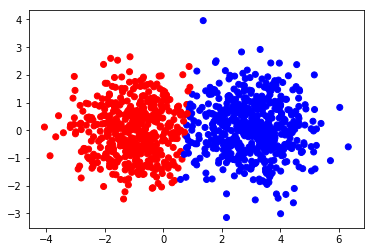

In [6]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

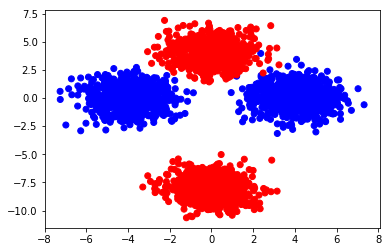

In [7]:
X_train, y_train, X_test, y_test = data.generate_non_linear_data(1000, 10)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [8]:
linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 34us/sample - loss: 2.8827 - accuracy: 0.6100
Epoch 2/100
1000/1000 [==============================] - 0s 30us/sample - loss: 2.6251 - accuracy: 0.6520
Epoch 3/100
1000/1000 [==============================] - 0s 31us/sample - loss: 2.4682 - accuracy: 0.6660
Epoch 4/100
1000/1000 [==============================] - 0s 29us/sample - loss: 2.3516 - accuracy: 0.6820
Epoch 5/100
1000/1000 [==============================] - 0s 30us/sample - loss: 2.2526 - accuracy: 0.6810
Epoch 6/100
1000/1000 [==============================] - 0s 30us/sample - loss: 2.1650 - accuracy: 0.6800
Epoch 7/100
1000/1000 [==============================] - 0s 30us/sample - loss: 2.0857 - accuracy: 0.6810
Epoch 8/100
1000/1000 [==============================] - 0s 30us/sample - loss: 2.0123 - accuracy: 0.6790
Epoch 9/100
1000/1000 [==============================] - 0s 29us/sample - loss: 1.9422 - accuracy: 0.6800
Epoch 10/100
1000/1000 [======================

1000/1000 [==============================] - 0s 30us/sample - loss: 0.6681 - accuracy: 0.4480
Epoch 78/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6681 - accuracy: 0.4560
Epoch 79/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.6680 - accuracy: 0.4490
Epoch 80/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.6680 - accuracy: 0.4520
Epoch 81/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6679 - accuracy: 0.4570
Epoch 82/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6679 - accuracy: 0.4570
Epoch 83/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.6680 - accuracy: 0.4560
Epoch 84/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6679 - accuracy: 0.4560
Epoch 85/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6680 - accuracy: 0.4570
Epoch 86/100
1000/1000 [==========================

Again, let's make predictions on the test set...

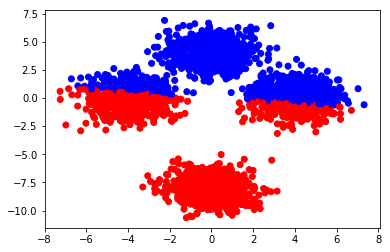

In [9]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network

Ok, now it's your turn.  Build a deeper neural network below.  Try to achieve a loss less than 0.05.

In [26]:
deep_model = keras.Sequential([
    ### YOUR CODE HERE
    # Hint, try "relu" as your activation function.
    # This is the most common nonlinearity for the main body of the network as its derivative is identically 1.
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?
    ### END YOUR CODE
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid', input_shape=(10,))
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 164us/sample - loss: 0.9923 - accuracy: 0.5230
Epoch 2/100
1000/1000 [==============================] - 0s 33us/sample - loss: 0.9296 - accuracy: 0.5230
Epoch 3/100
1000/1000 [==============================] - 0s 33us/sample - loss: 0.8739 - accuracy: 0.5230
Epoch 4/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.8256 - accuracy: 0.5230
Epoch 5/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.7844 - accuracy: 0.5230
Epoch 6/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.7500 - accuracy: 0.5230
Epoch 7/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.7227 - accuracy: 0.5210
Epoch 8/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.7008 - accuracy: 0.5140
Epoch 9/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.6829 - accuracy: 0.5060
Epoch 10/100
1000/1000 [=====================

1000/1000 [==============================] - 0s 33us/sample - loss: 0.1807 - accuracy: 0.9950
Epoch 78/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1764 - accuracy: 0.9960
Epoch 79/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1721 - accuracy: 0.9960
Epoch 80/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1680 - accuracy: 0.9960
Epoch 81/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1640 - accuracy: 0.9960
Epoch 82/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1602 - accuracy: 0.9960
Epoch 83/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1565 - accuracy: 0.9960
Epoch 84/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1528 - accuracy: 0.9950
Epoch 85/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.1493 - accuracy: 0.9950
Epoch 86/100
1000/1000 [==========================

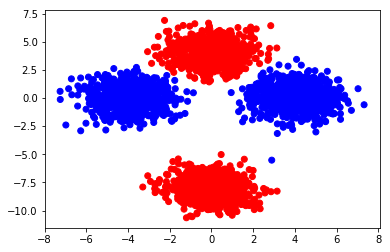

In [15]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow!